In [9]:
import glob
import os
from lsst import afw
print(afw.version.__version__)
from lsst.daf.persistence import Butler
from lsst.eotest.sensor import MaskedCCD, makeAmplifierGeometry
import numpy

from exploreRun import exploreRun
from lsst.eo_utils.base.image_utils import get_ccd_from_id,\
    get_amp_list, get_data_as_read, sort_sflats

from lsst.eo_utils.base.data_access import get_data_for_run

import lsst.eotest.image_utils as imutil
import pylab

from astropy.io import fits
from astropy.stats import mad_std
import numpy as np

import scipy
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt

import math

%matplotlib inline

20.0.0-4-gde602ef96+1


[5.095541401273885, 10.615711252653927, 7.643312101910828, 11.8895966029724, 13.588110403397028, 25.477707006369428]


Text(0.5, 1.0, 'Response Curve/SED for LSST LEDs')

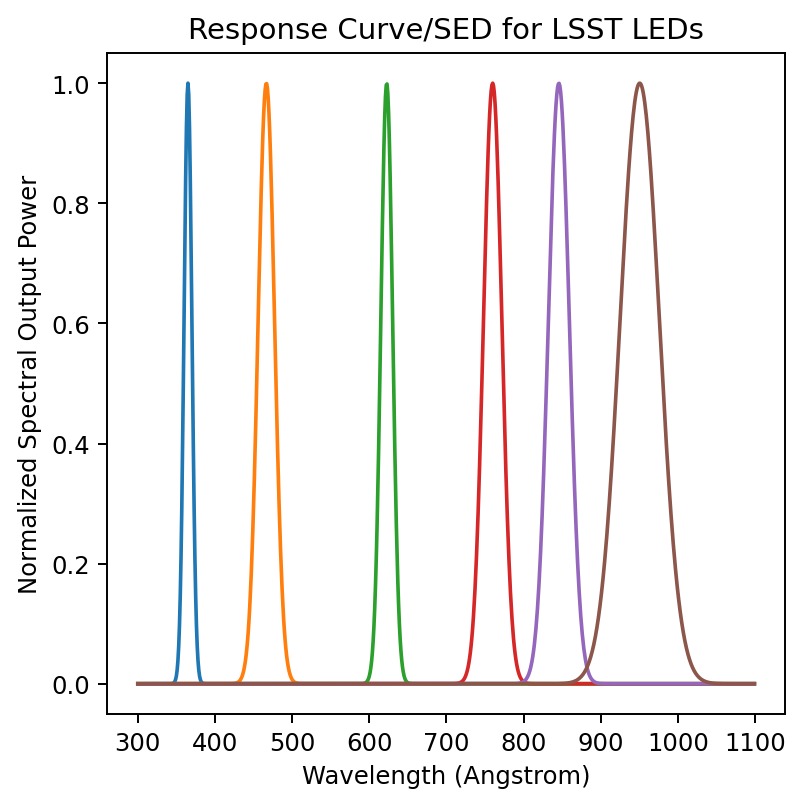

In [10]:
"""
shows all 6 filters and their Gaussian curves ... u,g,r,i,g,y

peak wavelengths are 365, 466.6, 622.6, 759.9, 845.7, 950.5
widths are (12, 25, 18, 28, 32, 60) / 2.355 to convert to sigma
mu = wavelength, sigma = width in wavelength (resolution of LED beam) ... define for each LED

"""

fig, axs = pylab.subplots(figsize=(5,5),dpi=175)

wavelengths_list = [365, 466.6, 622.6, 759.9, 845.7, 950.5]
width_of_wavelength_list = [12, 25, 18, 28, 32, 60]
width_of_wavelength_list_converted = []
for num in width_of_wavelength_list:
    x = num / 2.355
    width_of_wavelength_list_converted.append(x)
# now wavelength widths converted from FWHM to sigma
print(width_of_wavelength_list_converted)

# plotting each LED's gaussian
for i in range(len(wavelengths_list)):
    mu = wavelengths_list[i]
    sigma = width_of_wavelength_list_converted[i]

    a = 1
    x = numpy.arange(300,1100,1)
    y = a*numpy.exp(-(x-mu)**2/(2*sigma**2))

    pylab.plot(x, y)

# labeling plot
pylab.xlabel("Wavelength (nm)")
pylab.ylabel("Normalized Spectral Output Power")
pylab.title("Response Curve/SED for LSST LEDs")